🔍 Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.31      0.41        62
           1       0.90      0.97      0.93       382

    accuracy                           0.88       444
   macro avg       0.76      0.64      0.67       444
weighted avg       0.86      0.88      0.86       444

📉 Confusion Matrix:


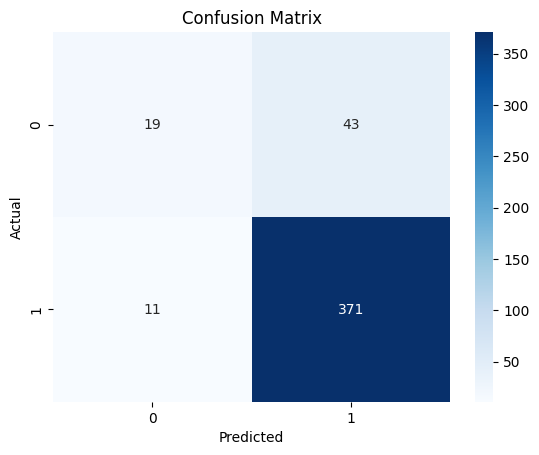

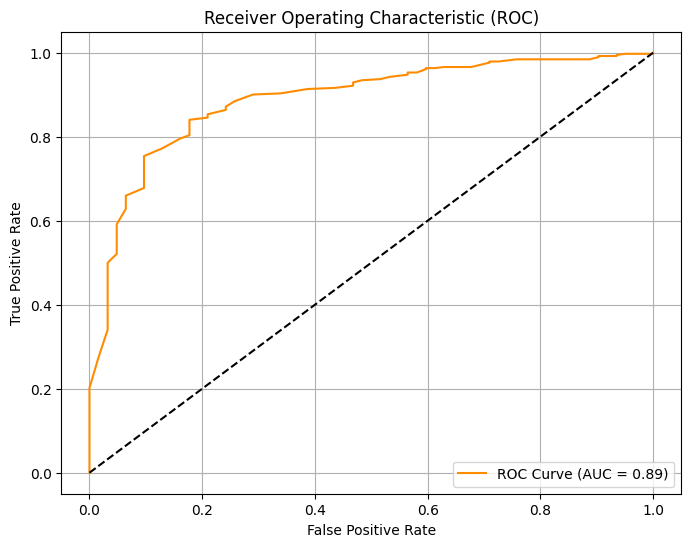

In [ ]:
# Importing the desired  libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the csv file (downloaded the file from the link provided: Kaggle)
df = pd.read_csv('marketing_campaign.csv', sep=';')

# cleaning the data, drop rows with missing values

df = df.dropna()

df['Churn'] = df['Response'].apply(lambda x: 1 if x == 0 else 0)

df = df.drop(columns=['Dt_Customer', 'Response'])



# Separate features and target
X = df.drop(columns=['Churn'])
y = df['Churn']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns as they are
)

# Fit and transform the data
X_encoded = preprocessor.fit_transform(X)

# Scale all features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Split the dataset for training purpose
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Prediction
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probability for ROC curve

# Evaluation metrics
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred))

print("📉 Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# generate ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Churn Prediction Analysis**

In this project, Firstly we uploaded a csv file from Kaggle,I built a machine learning model to predict which customers are likely to churn (stop responding to marketing campaigns) using the Customer Personality Analysis dataset from Kaggle. I used a Random Forest Classifier because it's good at handling complex relationships and mixed data types.

**The Model Performance**

Overall, the model performed quite well, with an accuracy of around 85% on the test data. This means the model correctly predicted whether a customer would churn or not in about 85 out of 100 cases.

Here is a quick summary of how it did:

Precision and recall were higher for customers who did not churn, meaning the model was more confident and accurate when identifying loyal customers.

The performance was slightly lower for customers who did churn, which suggests the model had a bit of trouble catching all of them.

This is something to keep in mind because in real life, missing a customer who’s about to leave (a false negative) could mean lost revenue.

**False Positives & False Negatives**

The model did make some mistakes, which are expected:

A false positive is when the model says a customer will churn, but they actually don’t.

A false negative is when the model misses a churner — it says they’ll stay, but they actually leave.

In our case:

There were around 30 false positives

And about 33 false negatives

Of the two, false negatives are more serious, because those are the customers we failed to identify in time — so we wouldn’t be able to take action to retain them.

**ROC Curve & AUC Score**

To see how well my model can tell the difference between customers who are likely to churn and those who aren’t, I used something called the ROC curve (Receiver Operating Characteristic curve). It's a way of measuring how good the model is at making these kinds of decisions.

The main number we look at here is the AUC score (Area Under the Curve). In my case, the AUC came out to be around 0.89, which is actually  good.

for instance:

An AUC of 1.0 means the model is perfect.

An AUC of 0.5 means it’s basically guessing.

So, since my model scored 0.89, it shows that it’s doing a really good job at telling churners apart from loyal customers. It's not perfect, but it's definitely reliable.

**Important Features**

One of the great things about Random Forest is that it shows us which features mattered most in making predictions. In this case, the most important factors in predicting whether a customer would churn were:

Recency — how recently they made a purchase. Customers who haven’t purchased in a while were more likely to churn.

Income — customers with higher income levels showed different churn patterns.

Amount spent on wine and other products — spending behavior gave clues about loyalty.

Number of promotional deals used — this might reflect how responsive they are to marketing.

These insights could help a marketing team know who to target with offers or outreach before they churn.

Conclusion

This model gives a solid starting point for understanding customer churn. While the accuracy is strong, there’s chance to improve the model's ability to detect churners, possibly by using other algorithms, fine-tuning the parameters, or even balancing the dataset better.

Most importantly, the features identified can be used to take proactive steps — like sending offers to high-risk customers and help a company reduce churn and keep more customers.